# `regression.XGBoostRegressor`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [3]:
from slickml.regression import XGBoostRegressor

help(XGBoostRegressor)

Help on class XGBoostRegressor in module slickml.regression._xgboost:

class XGBoostRegressor(sklearn.base.BaseEstimator, sklearn.base.RegressorMixin)
 |  XGBoostRegressor(num_boost_round: Optional[int] = 200, metrics: Optional[str] = 'rmse', sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict] = None) -> None
 |  
 |  XGBoost Regressor.
 |  
 |  This is wrapper using XGBoost regressor to train a XGBoost [1]_ model using the number of
 |  boosting rounds from the inputs. This is also the base class for ``XGBoostCVRegressor``.
 |  
 |  Parameters
 |  ----------
 |  num_boost_round : int, optional
 |      Number of boosting rounds to fit a model, by default 200
 |  
 |  metrics : str, optional
 |      Metrics to be tracked at fitting time with possible values of ``"rmse"``, ``"rmsle"``,
 |      ``"mae"``. Note this is different than `eval_metric` that needs to be

### Example 1: `XGBoostRegressor` model for `california-housing` data set

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
)

In [5]:
# custom params
params = {
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
reg = XGBoostRegressor(
    num_boost_round=300,
    metrics="rmsle",
    params=params,
)
reg.fit(X_train, y_train)

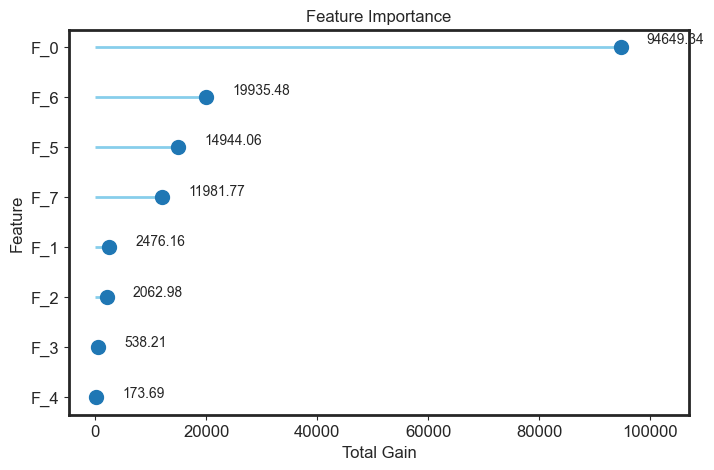

In [7]:
reg.plot_feature_importance()

In [8]:
# pred target values (or reg.y_pred_)
y_pred = reg.predict(X_test)
y_pred[:10]

array([0.51361454, 2.5672166 , 2.2034857 , 1.9853568 , 1.1749872 ,
       2.557313  , 0.9076447 , 2.5674822 , 2.3208678 , 1.6299468 ],
      dtype=float32)

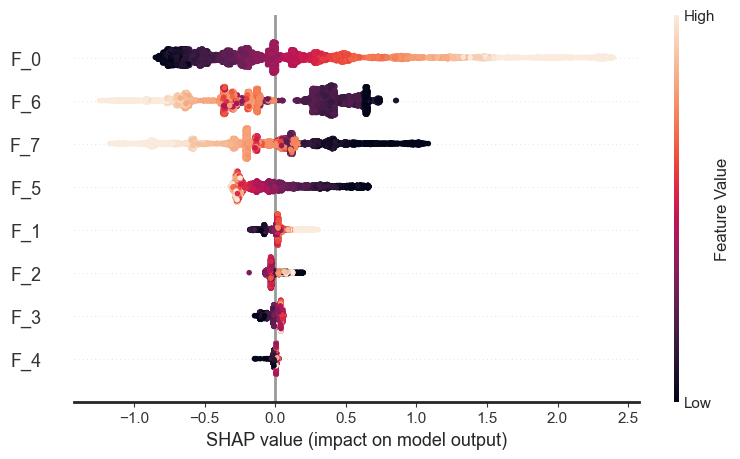

In [9]:
# shap summary plot of validation set
reg.plot_shap_summary(validation=True)

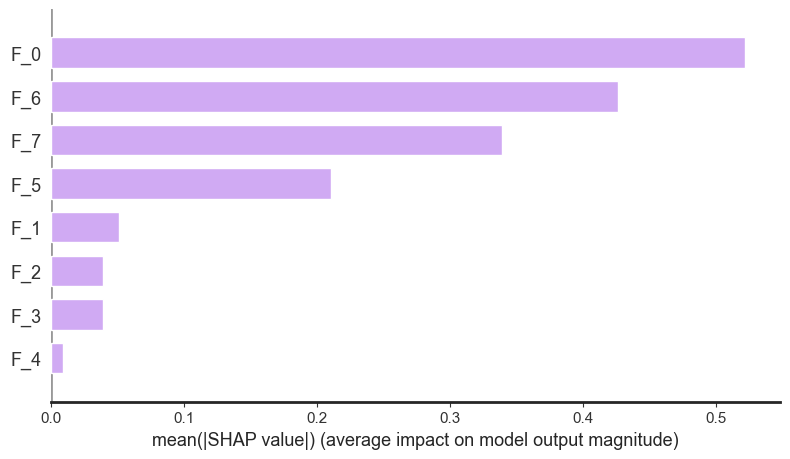

In [10]:
# shap summary bar plot of validation set
reg.plot_shap_summary(plot_type="bar")

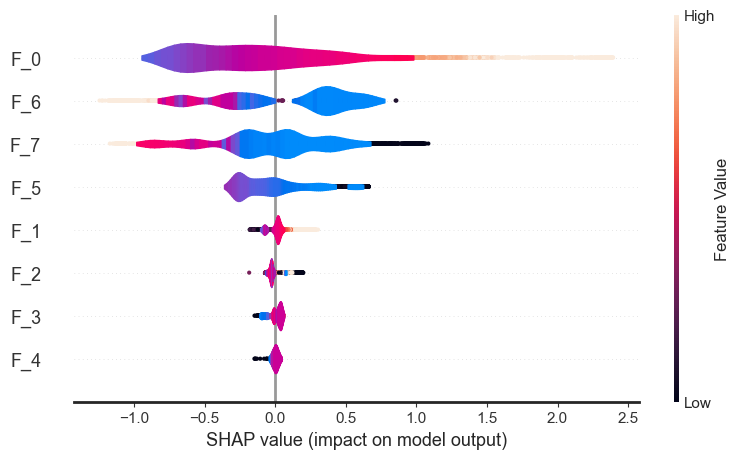

In [11]:
# shap summary plot (violin)
reg.plot_shap_summary(plot_type="violin")

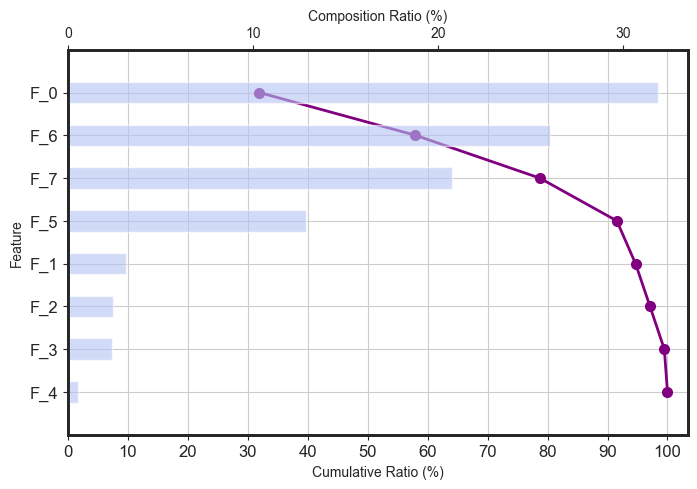

In [12]:
# plot shap waterfall plot
reg.plot_shap_waterfall()

In [20]:
# model's fitting params (or reg.params)
reg.get_params()

{'eval_metric': 'rmse',
 'tree_method': 'hist',
 'objective': 'reg:squarederror',
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'gamma': 0.0,
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'subsample': 0.9,
 'max_delta_step': 1,
 'verbosity': 0,
 'nthread': 4}

In [21]:
reg.model_

## You can use the `RegressionMetrics` class to evaluate your model

In [13]:
from slickml.metrics import RegressionMetrics

metrics = RegressionMetrics(y_test, y_pred)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.763000,0.763000,0.395000,0.323000,0.030000,0.224000,0.849000,0.328000,1.077000


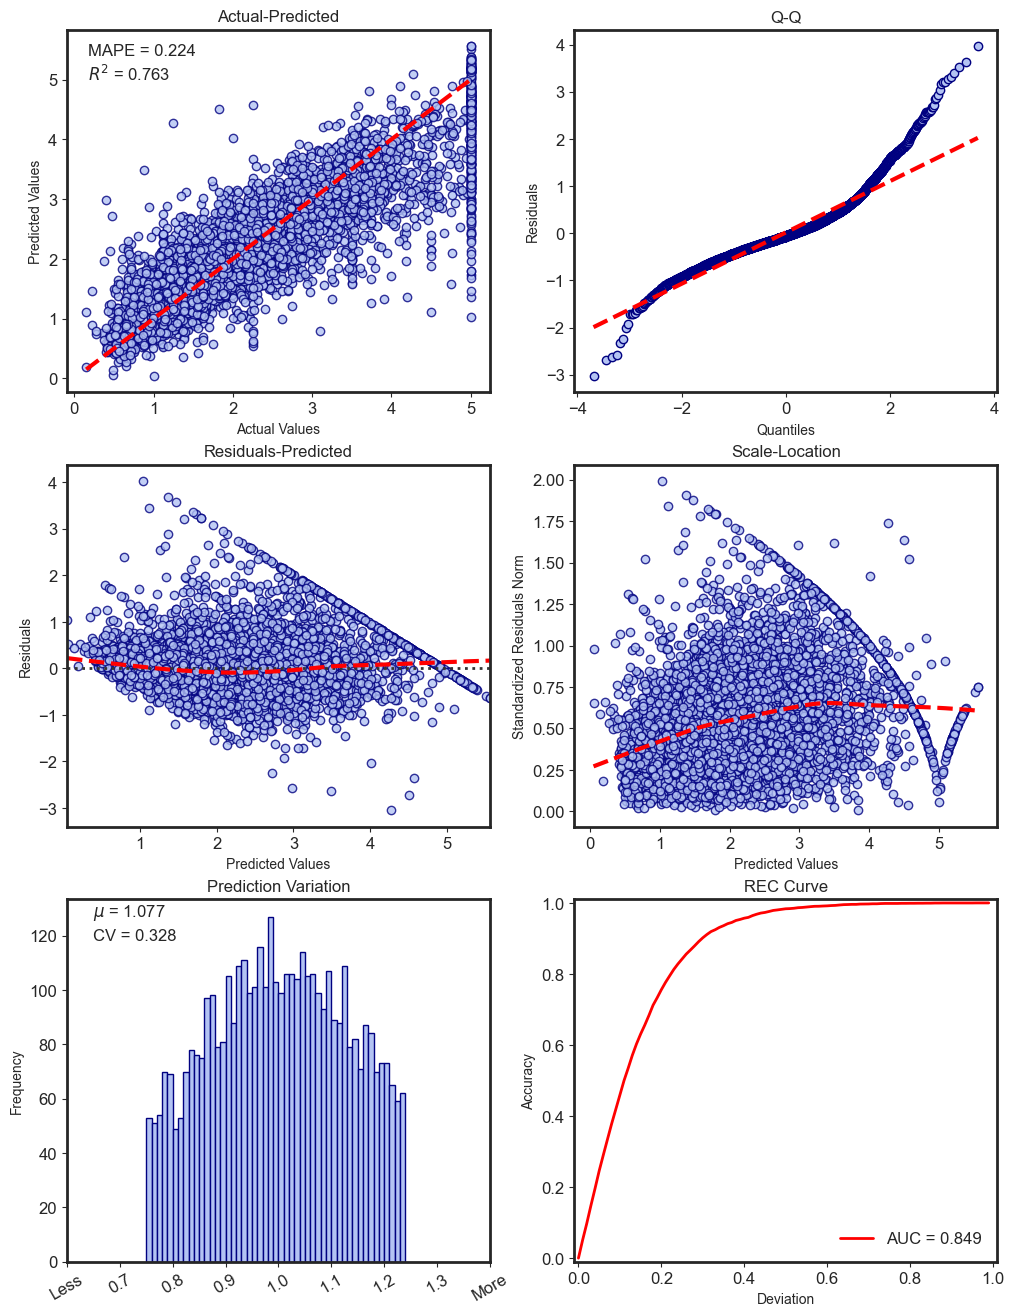

In [14]:
metrics.plot()